In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import kernel_ridge
import seaborn as sn
import scipy.stats

## Import Data Set

In [2]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [3]:
# Group data into blocks
blocks_X = np.reshape(X_data, (12,7,720))
blocks_Y = np.reshape(Y_data, (12,7,720))
print('Naive occupancy')
print(blocks_X[0,0,:10])
print('Actual occupancy')
print(blocks_Y[0,0,:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (12,7))
print(block_names[0])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28']


## Blocks Characteristics

In [5]:
blocks_char = pd.read_csv('Blockface.csv')
blocks_char

,ELMNTKEY,UNITDESC,TOTAL_SPACES,PAID_SPACES,RPZ_SPACES,BUS,TOTAL_NOPARK,TOTAL_ZONES,PARKING_SPACES,WKD_RATE1,WKD_RATE2,SAT_RATE1,SAT_RATE2,PAIDAREA,PARKING_TIME_LIMIT,START_TIME_WKD,END_TIME_WKD,START_TIME_SAT,END_TIME_SAT,PRIMARYDISTRICTCD
0,1433,11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST,41,26,0,0,15,0,26,0.5,1.0,0.5,1.0,University District,240,08AM,06PM,08AM,06PM,DISTRICT4
1,47225,15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST,13,6,0,0,6,1,6,0.5,2.0,0.5,2.0,University District,120,08AM,08PM,08AM,08PM,DISTRICT4
2,24041,1ST AVE BETWEEN BELL ST AND BATTERY ST,25,12,0,0,11,3,11,0.5,1.0,0.5,1.0,Belltown,240,08AM,08PM,08AM,08PM,DISTRICT7
3,70750,2ND AVE BETWEEN LENORA ST AND BLANCHARD ST,15,10,0,0,3,3,9,0.5,2.5,0.5,2.5,Belltown,120,08AM,08PM,08AM,08PM,DISTRICT7
4,53138,6TH AVE N BETWEEN JOHN ST AND THOMAS ST,24,18,0,0,4,2,18,0.5,0.5,0.5,0.5,Uptown Triangle,600,08AM,10PM,08AM,10PM,DISTRICT7
5,30970,7TH AVE BETWEEN OLIVE WAY AND STEWART ST,12,6,0,0,5,1,6,0.5,3.0,0.5,3.0,Denny Triangle,120,08AM,08PM,08AM,08PM,DISTRICT7
6,77317,BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST,23,5,3,0,14,5,4,0.5,1.0,0.5,1.0,Pike-Pine,120,08AM,10PM,08AM,10PM,DISTRICT3
7,10165,EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST,16,10,0,1,6,0,10,0.5,0.5,0.5,0.5,South Lake Union,600,08AM,06PM,08AM,06PM,DISTRICT3
8,33146,FAIRVIEW AVE N BETWEEN JOHN ST AND THOMAS ST,24,14,0,0,10,1,13,1.5,1.5,1.5,1.5,South Lake Union,600,08AM,06PM,08AM,06PM,DISTRICT7
9,94602,FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND AL...,29,28,0,0,1,0,28,0.5,0.5,0.5,0.5,South Lake Union,120,08AM,06PM,08AM,06PM,DISTRICT3


### Summary
Highly correlated blocks: Roy St, Eastlake Ave and 6th Ave have low pay rate for morning and evening on both weekdays and Saturday. <br>
Uncorrelated blocks with respect to the correlated blocks above: 1st Ave, 2nd Ave, Boylston Ave have low pay rate for morning but higher pay rate during the evening on both weekdays and Saturday. Boylston Ave is the most uncorrelated potentially due to having the majority of the avaliable space being no parking zone.

## Test Correlation

In [6]:
# Correlation test MAE refer to training on only block A and testing on block B
# Combined MAE refer to training on both blocks except for 1 day in block B, compute testing error for 
# all days in block B

lambda_val = 0.3
gamma = 0.001

def corr_blocks(Ax, Ay, Bx, By):
    time = np.arange(720)
    rrg = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
    rrg.fit(Ax, Ay)
    
    prediction = rrg.predict(Bx)
    n = len(prediction)
    corr_error = 0
    error = 0
    
    for i in range(n):
        corr_error += np.mean(np.abs(By[i]-prediction[i]))
    
    #print("Correlation test MAE")
    #print(corr_error/n)
    
    for i in range(n):
        x_test = Bx[i]
        y_test = By[i]
        x_train = np.vstack((Ax, np.delete(Bx, i, axis=0)))
        y_train = np.vstack((Ay, np.delete(By, i, axis=0)))
        rrg.fit(x_train, y_train)
        prediction = rrg.predict(x_test.reshape(1,-1))
        error += np.mean(np.abs(y_test-prediction))
        
    #print("Combined MAE")
    #print(error/n)
    
    return corr_error/n, error/n

In [7]:
error_diff = np.empty((12,12))
for i in range(12):
    for j in range(12):
        corr_error, error = corr_blocks(blocks_X[i], blocks_Y[i], blocks_X[j], blocks_Y[j])
        error_diff[i][j] = error - corr_error

In [8]:
error_diff = error_diff.round(3)
print(error_diff)

[[ 0.003 -0.062 -0.099 -0.11  -0.134 -0.211 -0.105 -0.226 -0.478 -0.062
  -0.065 -0.192]
 [-0.075  0.     0.009 -0.1   -0.174 -0.062 -0.19  -0.323 -0.32  -0.024
  -0.042 -0.309]
 [-0.214 -0.088  0.008 -0.215 -0.236 -0.182 -0.291 -0.335 -0.215 -0.027
  -0.216 -0.344]
 [-0.066 -0.014  0.002  0.003 -0.225 -0.159 -0.012 -0.353 -0.54  -0.054
  -0.095 -0.345]
 [-0.274 -0.223 -0.215 -0.412 -0.    -0.35  -0.444 -0.125 -0.123 -0.047
  -0.242 -0.127]
 [-0.016 -0.038 -0.078 -0.029 -0.168 -0.004 -0.077 -0.31  -0.455 -0.088
  -0.01  -0.292]
 [-0.122 -0.067 -0.107 -0.057 -0.237 -0.3    0.006 -0.364 -0.477 -0.006
  -0.209 -0.371]
 [-0.311 -0.32  -0.313 -0.467 -0.07  -0.437 -0.494 -0.002 -0.081 -0.137
  -0.337 -0.029]
 [-0.622 -0.581 -0.484 -0.634 -0.448 -0.731 -0.511 -0.361  0.004 -0.366
  -0.689 -0.383]
 [-0.099 -0.118 -0.126 -0.215 -0.173 -0.289 -0.278 -0.239 -0.247  0.002
  -0.145 -0.231]
 [-0.038 -0.021 -0.042 -0.133 -0.205 -0.136 -0.182 -0.316 -0.384 -0.045
   0.    -0.292]
 [-0.237 -0.274 -0.27

In [9]:
df = pd.DataFrame(error_diff,columns=blocks_char['UNITDESC'], index=blocks_char['UNITDESC'])

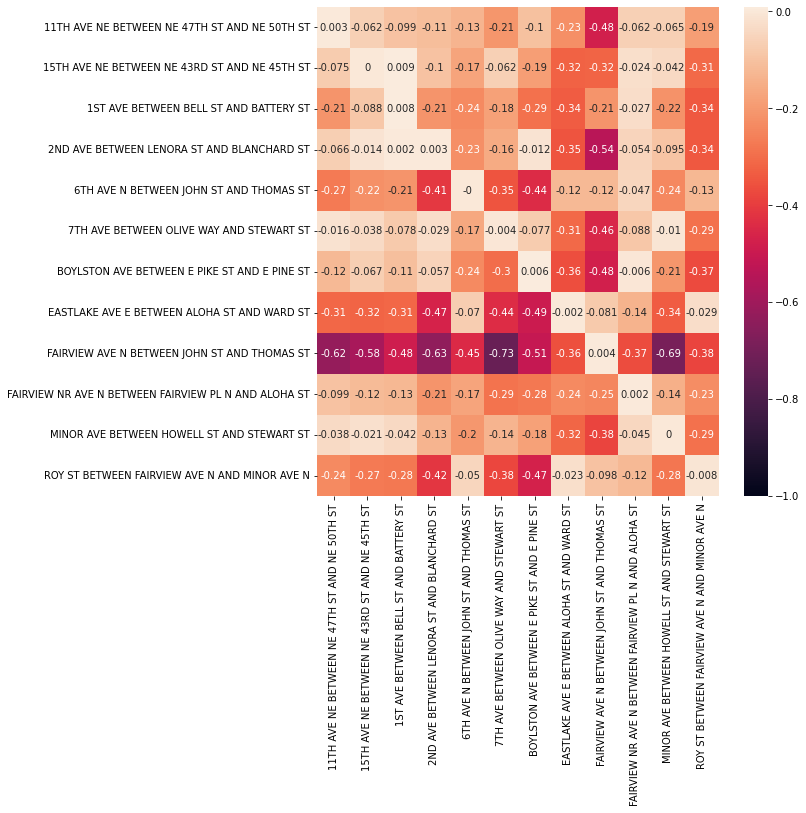

In [32]:
plt.figure(figsize=(9,9))
sn.heatmap(df, annot=True, vmin=-1)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [11]:
corr_map = [[1, -0.14, -0.18, -0.26, 0.61, -0.14, -0.57, 0.59, -0.27, 0.13, -0.39, 0.6],
            [-0.14, 1, 0.24, 0.45, -0.33, 0.3, 0.45, -0.46, 0.4, 0.25, 0.25, -0.48],
            [-0.18, 0.24, 1, 0.44, -0.26, -0.084, 0.42, -0.32, 0.28, -0.011, 0.14, -0.34],
            [-0.26, 0.45, 0.44, 1, -0.34, 0.31, 0.47, -0.34, 0.44, 0.12, 0.25, -0.36],
            [0.61, -0.33, -0.26, -0.34, 1, -0.016, -0.69, 0.88, -0.31, 0.25, -0.35, 0.87],
            [-0.14, 0.3, -0.084, 0.31, -0.016, 1, 0.23, 0.014, 0.39, 0.051, 0.3, -0.016],
            [-0.57, 0.45, 0.42, 0.47, -0.69, 0.23, 1, -0.68, 0.5, 0.022, 0.34, -0.71],
            [0.59, -0.46, -0.32, -0.34, 0.88, 0.014, -0.68, 1, -0.36, 0.087, -0.27, 0.97],
            [-0.27, 0.4, 0.28, 0.44, -0.31, 0.39, 0.5, -0.36, 1, 0.13, 0.19, -0.38],
            [0.13, 0.25, -0.011, 0.12, 0.25, 0.051, 0.022, 0.087, 0.13, 1, -0.018, 0.048],
            [-0.39, 0.25, 0.14, 0.25, -0.35, 0.3, 0.34, -0.27, 0.19, -0.018, 1, -0.31],
            [0.6, -0.48, -0.34, -0.36, 0.87, -0.016, -0.71, 0.97, -0.38, 0.048, -0.31, 1]]

In [12]:
dm = pd.DataFrame(corr_map,columns=blocks_char['UNITDESC'], index=blocks_char['UNITDESC'])

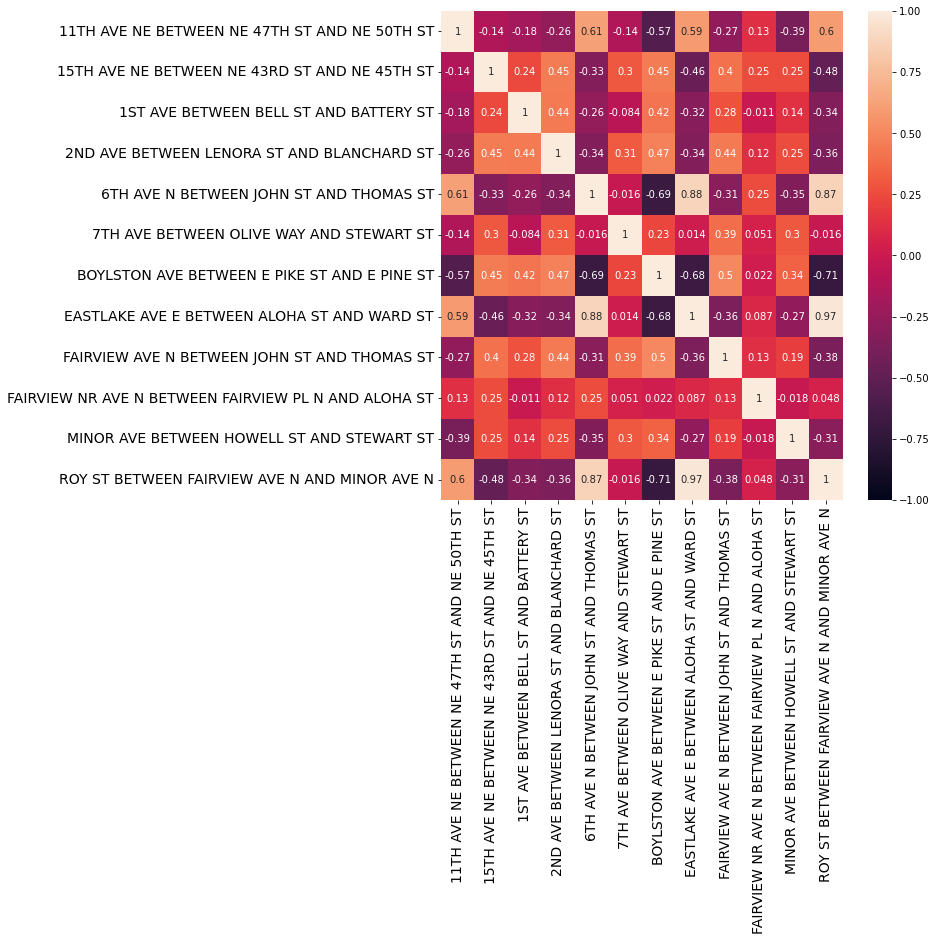

In [33]:
plt.figure(figsize=(9,9))
sn.heatmap(dm, annot=True, vmin=-1, vmax=1)
plt.xlabel("")
plt.ylabel("")
plt.tick_params(labelsize=14)
plt.show()

## Correlation Coefficient

In [14]:
corr_map = np.array(corr_map)
error_diff = np.array(error_diff)
x = corr_map.flatten()
y = error_diff.flatten()
print(len(x))

144


In [15]:
r_m = np.corrcoef(x, y)


r = r_m[0][1]
print("Correlation Coefficient")
print(r)

Correlation Coefficient
0.39444677032706765


## Siginificant Test 
Null Hypothesis: No correlation between the difference in testing MAE and correlated coefficient of the blocks <br>
Alternative Hypothesis: There is correlation between the difference in testing MAE and correlated coefficient of the blocks

In [16]:
t = (r * np.sqrt(144-2))/np.sqrt(1-r**2)
print(t)

5.11511549197043


In [17]:
p = scipy.stats.t.sf(t, df=144-2)
print("P-value:", p)

P-value: 4.992230844437341e-07


Using a siginificant level of 0.05, we can reject the null hypothesis because the p-value is less than 0.05

In [18]:
gt_color_roy= '#313695'
true_color_roy= '#74add1'
corr_color_roy= '#fdae61'
med_color_roy= '#f46d43'
bad_color_roy= '#a50026'

gt_color_6th = '#276419'
true_color_6th = '#7fbc41'
corr_color_6th = '#74add1'
med_color_6th = '#f46d43'
bad_color_6th = '#8e0152'

## MAE v.s Correlation Coefficient

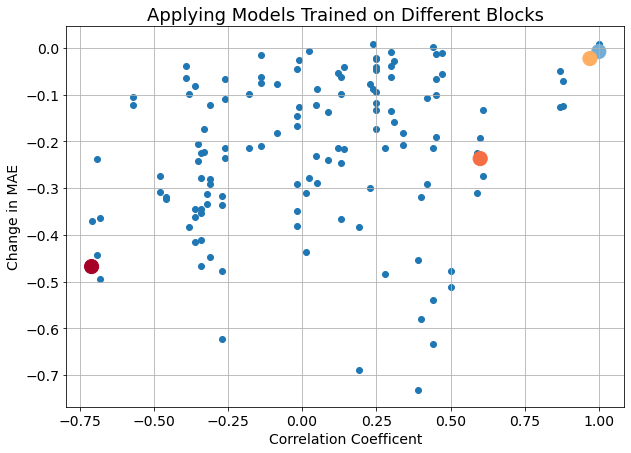

In [19]:
corr_vals = [corr_map[11,11], corr_map[11,7], corr_map[11,0], corr_map[11,6]]
diff_vals = [error_diff[11,11], error_diff[11,7], error_diff[11,0], error_diff[11,6]]
point_colors = [true_color_roy,corr_color_roy,med_color_roy,bad_color_roy]

plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Different Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_roy.png')
plt.savefig('./figures/mae_vs_corr_roy.pdf')
plt.show()

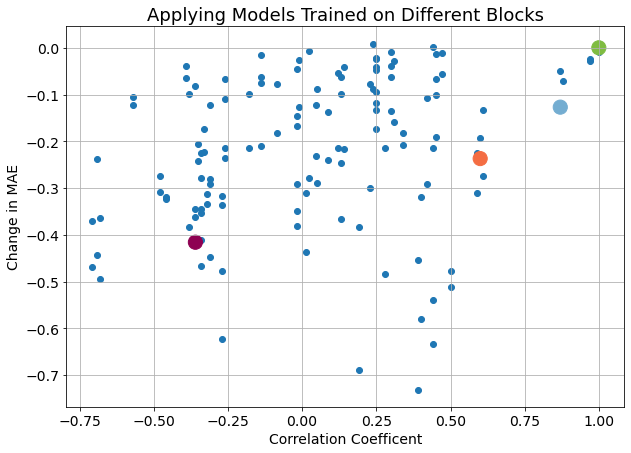

In [20]:
corr_vals = [corr_map[4,4], corr_map[4,11], corr_map[11,0], corr_map[11,3]]
diff_vals = [error_diff[4,4], error_diff[4,11], error_diff[11,0], error_diff[11,3]]
point_colors = [true_color_6th,corr_color_6th,med_color_6th,bad_color_6th]

plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Different Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_6th.png')
plt.savefig('./figures/mae_vs_corr_6th.pdf')
plt.show()

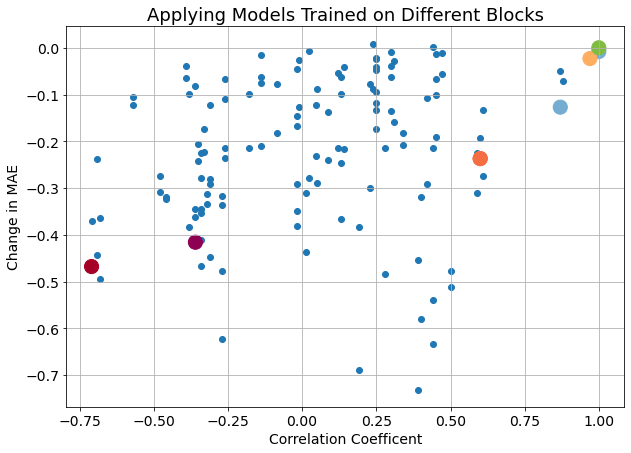

In [21]:
corr_vals = [corr_map[11,11], corr_map[11,7], corr_map[11,0], corr_map[11,6],
            corr_map[4,4], corr_map[4,11], corr_map[11,0], corr_map[11,3]]
diff_vals = [error_diff[11,11], error_diff[11,7], error_diff[11,0], error_diff[11,6],
            error_diff[4,4], error_diff[4,11], error_diff[11,0], error_diff[11,3]]
point_colors = [true_color_roy,corr_color_roy,med_color_roy,bad_color_roy,
               true_color_6th,corr_color_6th,med_color_6th,bad_color_6th]

plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Different Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_combined.png')
plt.savefig('./figures/mae_vs_corr_combined.pdf')
plt.show()

## Only Highly Correlated Blocks

In [22]:
n = len(x)
tol = 0.5
x_c = []
y_c = []
for i in range(n):
    if(x[i] >= tol and x[i] != 1):
        x_c.append(x[i])
        y_c.append(y[i])
print(len(x_c))

14


In [23]:
r_mc = np.corrcoef(x_c, y_c)

r_c = r_mc[0][1]
print("Correlation Coefficient")
print(r_c)

Correlation Coefficient
0.8625237873202234


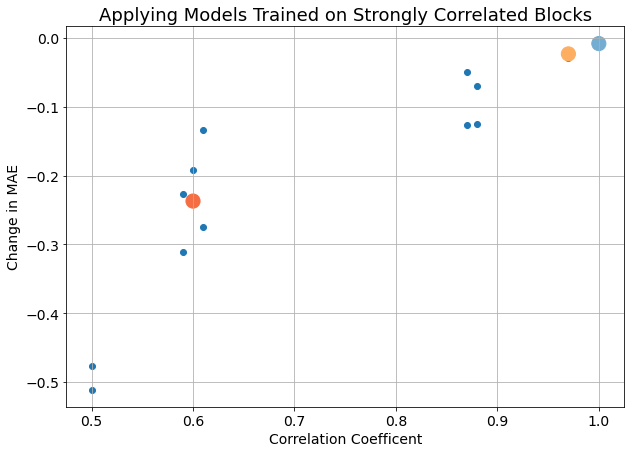

In [24]:
corr_vals = [corr_map[11,11], corr_map[11,7], corr_map[11,0]]
diff_vals = [error_diff[11,11], error_diff[11,7], error_diff[11,0]]
point_colors = [true_color_roy,corr_color_roy,med_color_roy]

plt.figure(figsize=(10,7))
plt.scatter(x_c,y_c)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Strongly Correlated Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_cutoff_roy.png')
plt.savefig('./figures/mae_vs_corr_cutoff_roy.pdf')
plt.show()

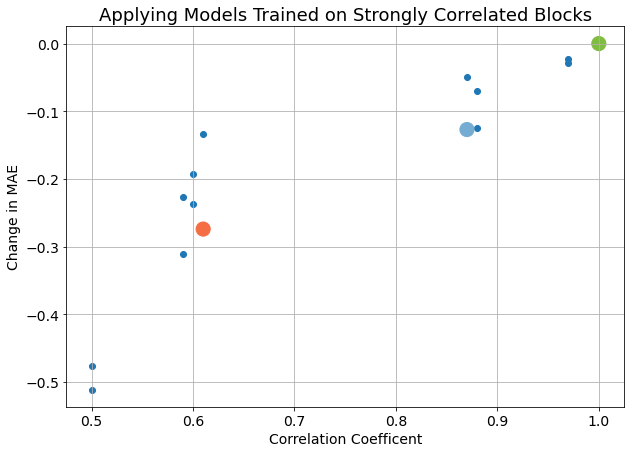

In [25]:
corr_vals = [corr_map[4,4], corr_map[4,11], corr_map[4,0]]
diff_vals = [error_diff[4,4], error_diff[4,11], error_diff[4,0]]
point_colors = [true_color_6th,corr_color_6th,med_color_6th]

plt.figure(figsize=(10,7))
plt.scatter(x_c,y_c)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Strongly Correlated Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_cutoff_6th.png')
plt.savefig('./figures/mae_vs_corr_cutoff_6th.pdf')
plt.show()

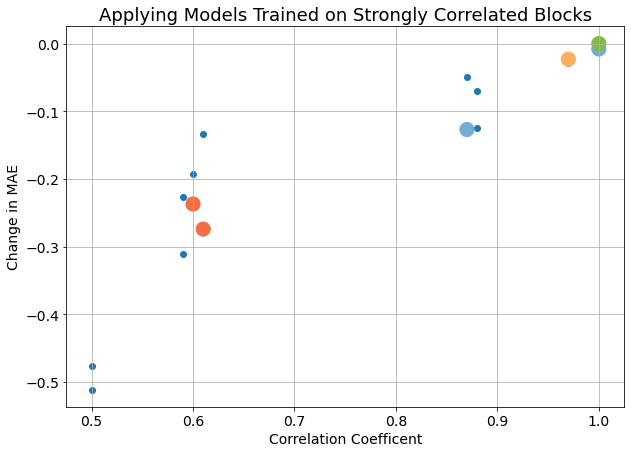

In [26]:
corr_vals = [corr_map[11,11], corr_map[11,7], corr_map[11,0],
            corr_map[4,4], corr_map[4,11], corr_map[4,0]]
diff_vals = [error_diff[11,11], error_diff[11,7], error_diff[11,0],
            error_diff[4,4], error_diff[4,11], error_diff[4,0]]
point_colors = [true_color_roy,corr_color_roy,med_color_roy,
               true_color_6th,corr_color_6th,med_color_6th]

plt.figure(figsize=(10,7))
plt.scatter(x_c,y_c)
plt.scatter(corr_vals,diff_vals,c=point_colors, s=200)
plt.title("Applying Models Trained on Strongly Correlated Blocks", fontsize=18)
plt.xlabel("Correlation Coefficent", fontsize=14)
plt.ylabel("Change in MAE", fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig('./figures/mae_vs_corr_cutoff_combined.png')
plt.savefig('./figures/mae_vs_corr_cutoff_combined.pdf')
plt.show()

In [27]:
m = len(x_c)
t_c = (r_c * np.sqrt(m-2))/np.sqrt(1-r_c**2)
print(t_c)

5.904688759217502


In [28]:
p_c = scipy.stats.t.sf(t_c, df=m-2)
print("P-value:", p_c)

P-value: 3.600165736654848e-05


Using a siginificant level of 0.05, we can reject the null hypothesis because the p-value is less than 0.05

In [29]:
blocks_char['UNITDESC']
# 8,6 red
# 11,7 Green

0         11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST
1         15TH AVE NE BETWEEN NE 43RD ST AND NE 45TH ST
2                1ST AVE BETWEEN BELL ST AND BATTERY ST
3            2ND AVE BETWEEN LENORA ST AND BLANCHARD ST
4               6TH AVE N BETWEEN JOHN ST AND THOMAS ST
5              7TH AVE BETWEEN OLIVE WAY AND STEWART ST
6          BOYLSTON AVE BETWEEN E PIKE ST AND E PINE ST
7           EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST
8          FAIRVIEW AVE N BETWEEN JOHN ST AND THOMAS ST
9     FAIRVIEW NR AVE N BETWEEN FAIRVIEW PL N AND AL...
10           MINOR AVE BETWEEN HOWELL ST AND STEWART ST
11        ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N
Name: UNITDESC, dtype: object

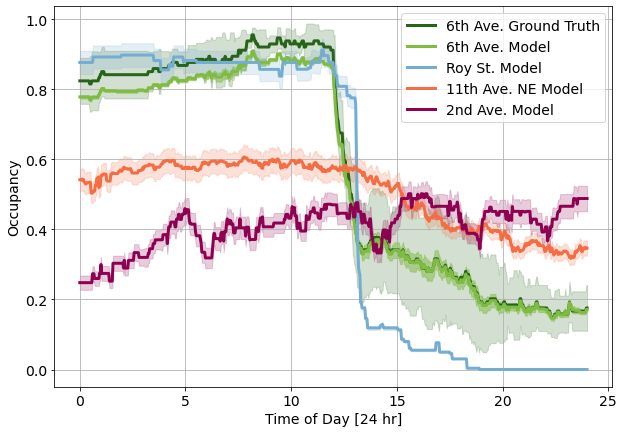

In [30]:
# 6th Ave
Ax = blocks_X[4]
Ay = blocks_Y[4]
Bx = blocks_X[11]
By = blocks_Y[11]
Cx = blocks_X[0]
Cy = blocks_Y[0]
Dx = blocks_X[3]
Dy = blocks_Y[3]

time = np.arange(720)

rrg_11 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_11.fit(Ax, Ay)
rrg_7 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_7.fit(Bx, By)
rrg_0 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_0.fit(Cx, Cy)
rrg_6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_6.fit(Dx, Dy)

true_prediction = rrg_11.predict(Ax)
corr_prediction = rrg_7.predict(Ax)
med_prediction = rrg_0.predict(Ax)
bad_prediction = rrg_6.predict(Ax)

days = [0,1,2,3,4,6]
mean_true = np.mean(true_prediction[days], axis=0)
std_true = np.std(true_prediction[days], axis=0)
mean_corr = np.mean(corr_prediction[days], axis=0)
std_corr = np.std(corr_prediction[days], axis=0)
mean_med = np.mean(med_prediction[days], axis=0)
std_med = np.std(med_prediction[days], axis=0)
mean_bad = np.mean(bad_prediction[days], axis=0)
std_bad = np.std(bad_prediction[days], axis=0)
mean_gt = np.mean(Ay[days], axis=0)
std_gt = np.std(Ay[days], axis=0)

hr = np.linspace(0,24,len(mean_true))
plt.figure(figsize=(10,7))
plt.plot(hr, mean_gt, linewidth=3, color=gt_color_6th, label='6th Ave. Ground Truth')
plt.fill_between(hr, mean_gt+std_gt, mean_gt-std_gt, alpha=0.2, color=gt_color_6th)
plt.plot(hr, mean_true, linewidth=3, color=true_color_6th, label='6th Ave. Model')
plt.fill_between(hr, mean_true+std_true, mean_true-std_true, alpha=0.5, color=true_color_6th)
plt.plot(hr, mean_corr, linewidth=3, color=corr_color_6th, label='Roy St. Model')
plt.fill_between(hr, mean_corr+std_corr, mean_corr-std_corr, alpha=0.2, color=corr_color_6th)
plt.plot(hr, mean_med, linewidth=3, color=med_color_6th, label='11th Ave. NE Model')
plt.fill_between(hr, mean_med+std_med, mean_med-std_med, alpha=0.2, color=med_color_6th)
plt.plot(hr, mean_bad, linewidth=3, color=bad_color_6th, label='2nd Ave. Model')
plt.fill_between(hr, mean_bad+std_bad, mean_bad-std_bad, alpha=0.2, color=bad_color_6th)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Time of Day [24 hr]', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
plt.grid()
plt.savefig('./figures/occ_predictions_6th.png')
plt.savefig('./figures/occ_predictions_6th.pdf')
plt.show()

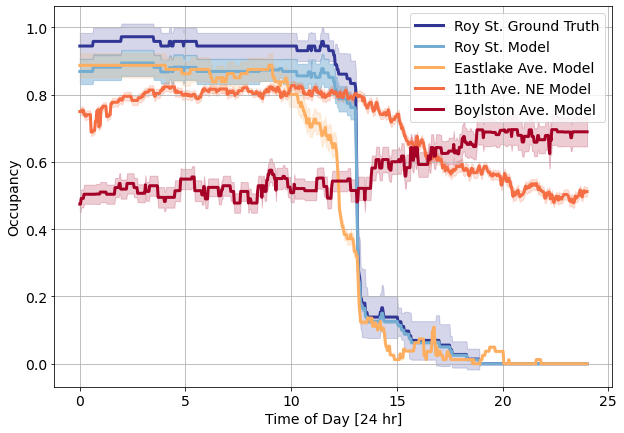

In [31]:
# Roy Street 
Ax = blocks_X[11]
Ay = blocks_Y[11]
Bx = blocks_X[7]
By = blocks_Y[7]
Cx = blocks_X[0]
Cy = blocks_Y[0]
Dx = blocks_X[6]
Dy = blocks_Y[6]

time = np.arange(720)
rrg_11 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_11.fit(Ax, Ay)
rrg_7 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_7.fit(Bx, By)
rrg_0 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_0.fit(Cx, Cy)
rrg_6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg_6.fit(Dx, Dy)

true_prediction = rrg_11.predict(Ax)
corr_prediction = rrg_7.predict(Ax)
med_prediction = rrg_0.predict(Ax)
bad_prediction = rrg_6.predict(Ax)

days = [0,1,2,3,4,6]
mean_true = np.mean(true_prediction[days], axis=0)
std_true = np.std(true_prediction[days], axis=0)
mean_corr = np.mean(corr_prediction[days], axis=0)
std_corr = np.std(corr_prediction[days], axis=0)
mean_med = np.mean(med_prediction[days], axis=0)
std_med = np.std(med_prediction[days], axis=0)
mean_bad = np.mean(bad_prediction[days], axis=0)
std_bad = np.std(bad_prediction[days], axis=0)
mean_gt = np.mean(Ay[days], axis=0)
std_gt = np.std(Ay[days], axis=0)

hr = np.linspace(0,24,len(mean_true))
plt.figure(figsize=(10,7))
plt.plot(hr, mean_gt, linewidth=3, color=gt_color_roy, label='Roy St. Ground Truth')
plt.fill_between(hr, mean_gt+std_gt, mean_gt-std_gt, alpha=0.2, color=gt_color_roy)
plt.plot(hr, mean_true, linewidth=3, color=true_color_roy, label='Roy St. Model')
plt.fill_between(hr, mean_true+std_true, mean_true-std_true, alpha=0.5, color=true_color_roy)
plt.plot(hr, mean_corr, linewidth=3, color=corr_color_roy, label='Eastlake Ave. Model')
plt.fill_between(hr, mean_corr+std_corr, mean_corr-std_corr, alpha=0.2, color=corr_color_roy)
plt.plot(hr, mean_med, linewidth=3, color=med_color_roy, label='11th Ave. NE Model')
plt.fill_between(hr, mean_med+std_med, mean_med-std_med, alpha=0.2, color=med_color_roy)
plt.plot(hr, mean_bad, linewidth=3, color=bad_color_roy, label='Boylston Ave. Model')
plt.fill_between(hr, mean_bad+std_bad, mean_bad-std_bad, alpha=0.2, color=bad_color_roy)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Time of Day [24 hr]', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
plt.grid()
plt.savefig('./figures/occ_predictions_roy.png')
plt.savefig('./figures/occ_predictions_roy.pdf')
plt.show()